# **Time Series problem**


---

**In this section we import the libraries we will use**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

# ***Car Retail Sales prediction***
this is a time series problem and will be solved by ARIMA forecasting model.

In [4]:
import matplotlib.dates as mdates
# Load the data
data = pd.read_csv('/content/data.csv')
data

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


In [34]:
from sklearn.preprocessing import LabelEncoder

# Sort the data by Year (if Year is the time feature)
df = data.sort_values(by='Year')

# Example of creating lag features for MSRP (assuming it's the target variable)
df['MSRP_lag1'] = df['MSRP'].shift(1)  # Lag of 1 year
df['MSRP_lag2'] = df['MSRP'].shift(2)  # Lag of 2 years

# Drop rows with missing lag values (since the first few rows won't have lag data)
df = df.dropna()

# One-Hot Encoding for categorical features
categorical_cols = [
    'Make', 'Model', 'Engine Fuel Type', 'Transmission Type',
    'Driven_Wheels', 'Market Category', 'Vehicle Size', 'Vehicle Style'
]

# Use pd.Categorical to convert columns
for col in categorical_cols:
    df[col] = pd.Categorical(df[col])

# Use get_dummies with drop_first to reduce dimensions
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)


# Label Encoding for ordinal features (e.g., Number of Doors or Vehicle Size)
le = LabelEncoder()
df_encoded['Number of Doors'] = le.fit_transform(df['Number of Doors'])

# Now df_encoded contains your processed features ready for time series analysis
df_encoded

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP,MSRP_lag1,MSRP_lag2,...,Vehicle Style_Convertible,Vehicle Style_Convertible SUV,Vehicle Style_Coupe,Vehicle Style_Crew Cab Pickup,Vehicle Style_Extended Cab Pickup,Vehicle Style_Passenger Minivan,Vehicle Style_Passenger Van,Vehicle Style_Regular Cab Pickup,Vehicle Style_Sedan,Vehicle Style_Wagon
767,1990,130.0,5.0,2,22,16,3105,2000,2000.0,2000.0,...,False,False,False,False,False,False,False,False,True,False
766,1990,108.0,4.0,2,28,19,3105,2000,2000.0,2000.0,...,False,False,False,False,False,False,False,False,True,False
758,1990,144.0,6.0,0,19,15,870,2000,2000.0,2000.0,...,False,False,True,False,False,False,False,False,False,False
757,1990,188.0,4.0,0,20,16,870,2000,2000.0,2000.0,...,False,False,True,False,False,False,False,False,False,False
755,1990,162.0,4.0,2,20,16,870,2000,2000.0,2000.0,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6489,2017,359.0,8.0,2,23,16,454,82305,72000.0,83000.0,...,False,False,False,False,False,False,False,False,True,False
6490,2017,386.0,8.0,2,24,16,454,72520,82305.0,72000.0,...,False,False,False,False,False,False,False,False,True,False
6491,2017,386.0,8.0,2,24,16,454,78820,72520.0,82305.0,...,False,False,False,False,False,False,False,False,True,False
6492,2017,359.0,8.0,2,23,16,454,75465,78820.0,72520.0,...,False,False,False,False,False,False,False,False,True,False


In [26]:
df_encoded.columns

Index(['Year', 'Engine HP', 'Engine Cylinders', 'Number of Doors',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP', 'MSRP_lag1',
       'MSRP_lag2',
       ...
       'Vehicle Style_Convertible', 'Vehicle Style_Convertible SUV',
       'Vehicle Style_Coupe', 'Vehicle Style_Crew Cab Pickup',
       'Vehicle Style_Extended Cab Pickup', 'Vehicle Style_Passenger Minivan',
       'Vehicle Style_Passenger Van', 'Vehicle Style_Regular Cab Pickup',
       'Vehicle Style_Sedan', 'Vehicle Style_Wagon'],
      dtype='object', length=868)

In [27]:
df_encoded.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP,MSRP_lag1,MSRP_lag2
count,8084.000000,8084.000000,8084.000000,8084.000000,8084.000000,8084.000000,8084.000000,8.084000e+03,8.084000e+03,8.084000e+03
mean,2012.058634,274.642751,5.778080,1.414151,26.650915,19.553686,1499.397823,5.007267e+04,4.656893e+04,4.525829e+04
std,6.317981,115.003475,1.886088,0.898087,7.720473,7.159964,1413.855615,7.029313e+04,6.692391e+04,6.036087e+04
min,1990.000000,55.000000,0.000000,0.000000,12.000000,7.000000,2.000000,2.000000e+03,2.000000e+03,2.000000e+03
25%,2010.000000,192.000000,4.000000,0.000000,22.000000,16.000000,549.000000,2.591875e+04,2.459500e+04,2.419250e+04
50%,2015.000000,264.000000,6.000000,2.000000,26.000000,18.000000,1013.000000,3.500500e+04,3.339500e+04,3.299500e+04
75%,2016.000000,320.000000,6.000000,2.000000,30.000000,22.000000,2009.000000,4.872250e+04,4.657000e+04,4.598000e+04
max,2017.000000,1001.000000,16.000000,2.000000,354.000000,137.000000,5657.000000,2.065902e+06,2.065902e+06,2.065902e+06


# ***Important plots to get some sense from the data***

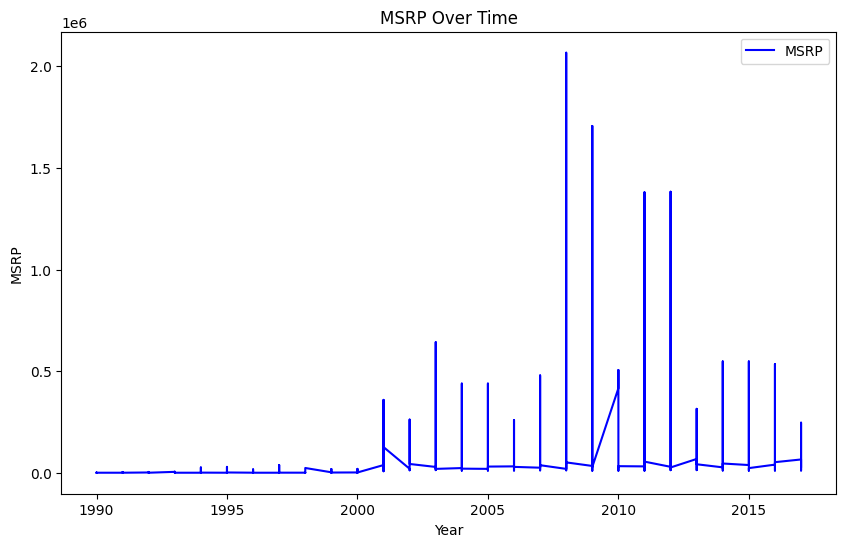

In [8]:
import plotly.express as pximport ,matplotlib.pyplot as plt

# Line plot for MSRP over time
plt.figure(figsize=(10, 6))
plt.plot(df_encoded['Year'], df_encoded['MSRP'], label='MSRP', color='blue')
plt.xlabel('Year')
plt.ylabel('MSRP')
plt.title('MSRP Over Time')
plt.legend()
plt.show()

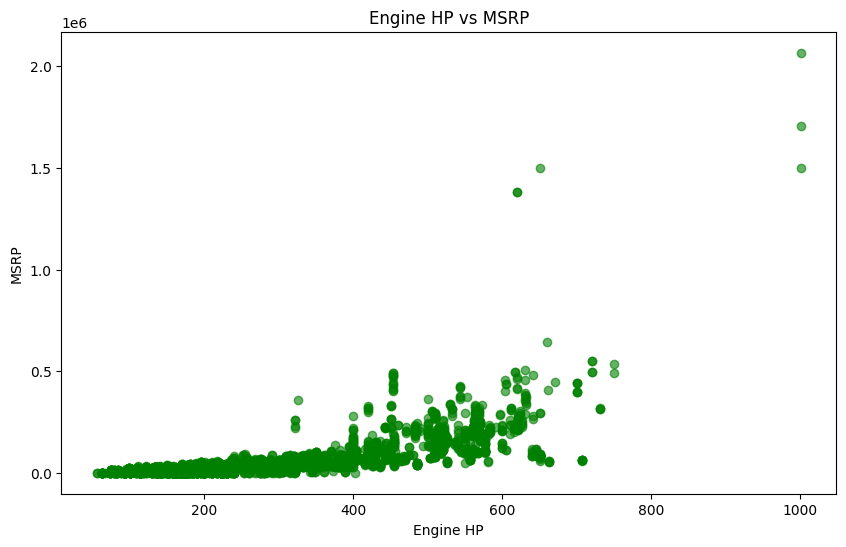

In [9]:
# Scatter plot for Engine HP vs MSRP
plt.figure(figsize=(10, 6))
plt.scatter(df_encoded['Engine HP'], df_encoded['MSRP'], alpha=0.6, color='green')
plt.xlabel('Engine HP')
plt.ylabel('MSRP')
plt.title('Engine HP vs MSRP')
plt.show()

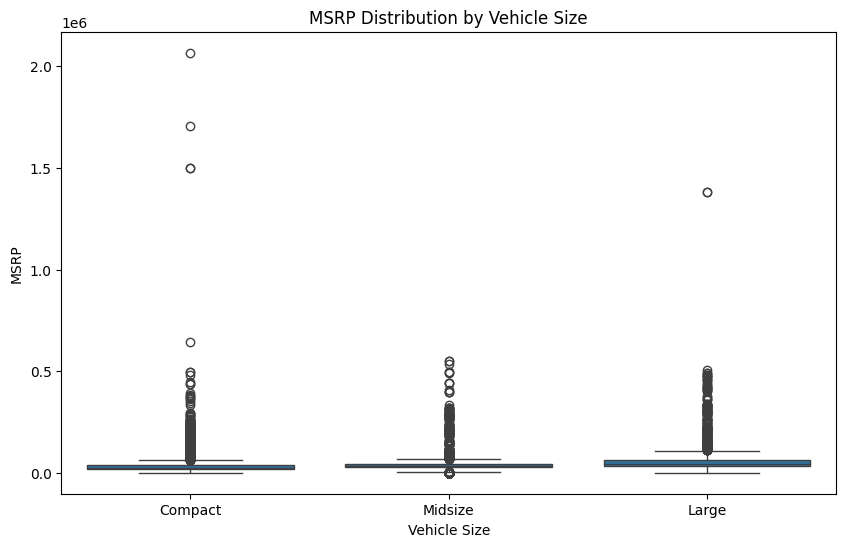

In [10]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x='Vehicle Size', y='MSRP', data=df)
plt.title('MSRP Distribution by Vehicle Size')
plt.show()

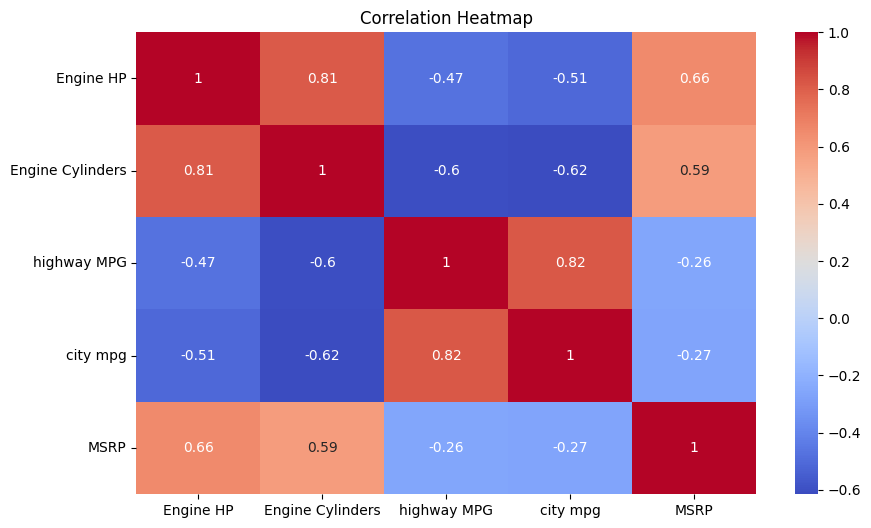

In [11]:
import seaborn as sns
import numpy as np

# Compute the correlation matrix
corr_matrix = df_encoded[['Engine HP', 'Engine Cylinders', 'highway MPG', 'city mpg', 'MSRP']].corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

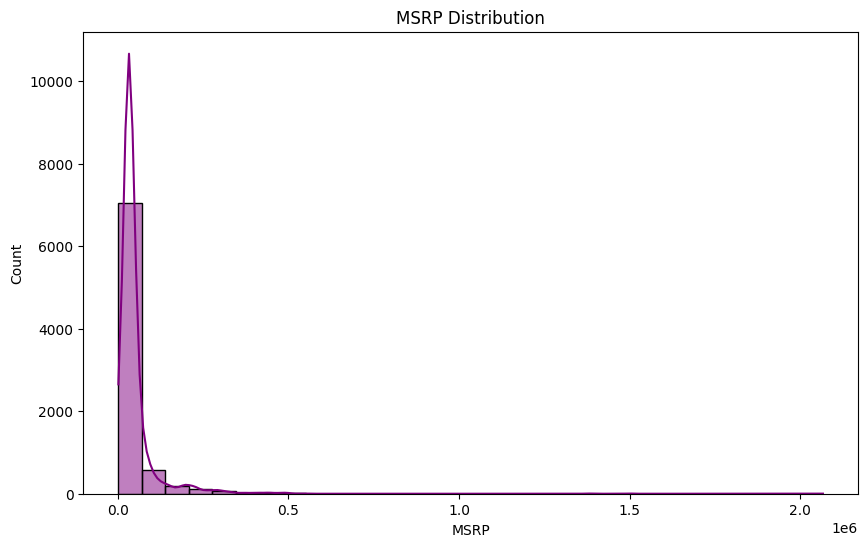

In [12]:
# Distribution plot for MSRP
plt.figure(figsize=(10, 6))
sns.histplot(df['MSRP'], bins=30, color='purple', kde=True)
plt.title('MSRP Distribution')
plt.xlabel('MSRP')
plt.show()

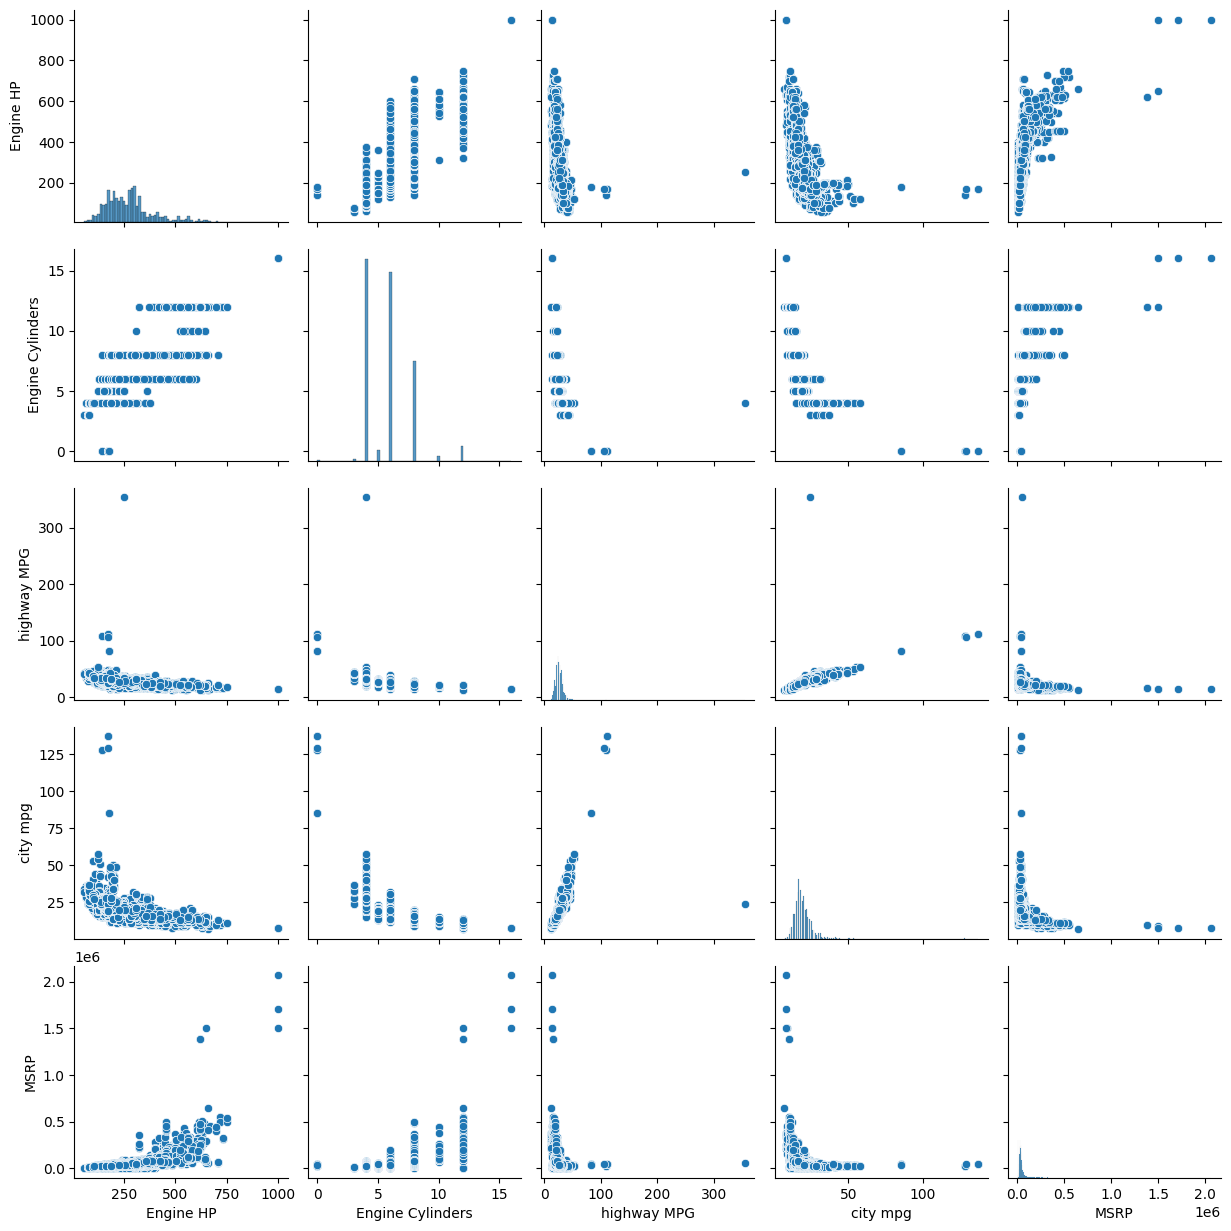

In [13]:
# Pairplot to visualize relationships between numerical features
sns.pairplot(df[['Engine HP', 'Engine Cylinders', 'highway MPG', 'city mpg', 'MSRP']])
plt.show()


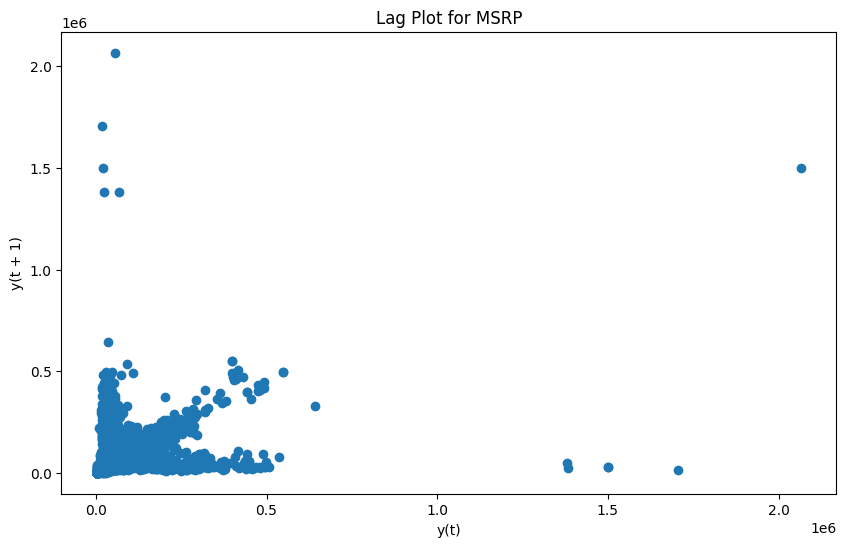

In [14]:
from pandas.plotting import lag_plot

plt.figure(figsize=(10, 6))
lag_plot(df['MSRP'])
plt.title('Lag Plot for MSRP')
plt.show()

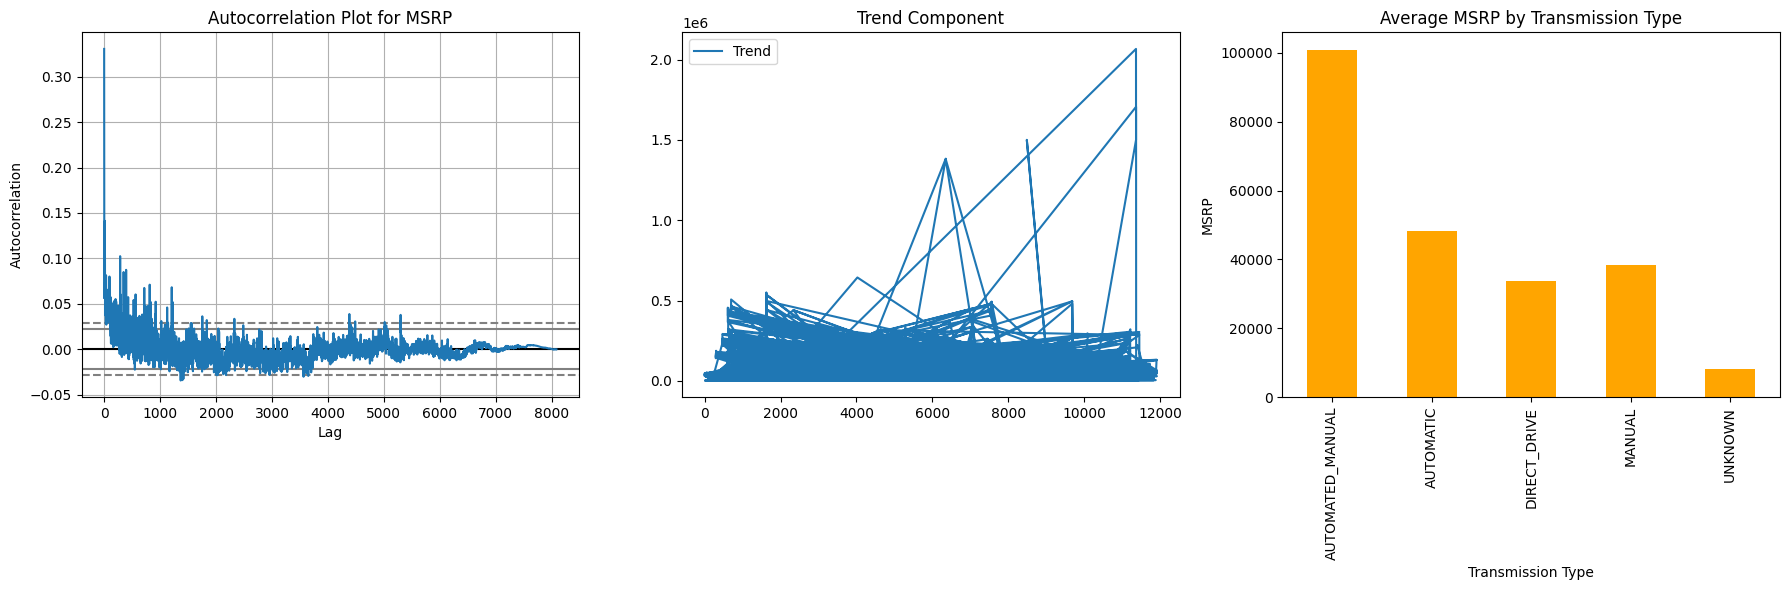

In [17]:
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.seasonal import seasonal_decompose

# Create a 1x3 grid for subplots (1 row, 3 columns)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot 1: Autocorrelation Plot for MSRP
autocorrelation_plot(df['MSRP'], ax=axes[0])
axes[0].set_title('Autocorrelation Plot for MSRP')

# Plot 2: Seasonal Decomposition Plot for MSRP (manually add trend, seasonal, residual)
result = seasonal_decompose(df['MSRP'], model='additive', period=1)

# Only plot the trend component in the second slot (axes[1])
axes[1].plot(result.trend, label='Trend')
axes[1].set_title('Trend Component')
axes[1].legend()

# Plot 3: Bar Plot of Average MSRP by Transmission Type
df.groupby('Transmission Type')['MSRP'].mean().plot(kind='bar', color='orange', ax=axes[2])
axes[2].set_title('Average MSRP by Transmission Type')
axes[2].set_ylabel('MSRP')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


In [35]:
from sklearn.preprocessing import LabelEncoder
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error

df_encoded['Year'] = pd.to_datetime(df_encoded['Year'], format='%Y')
df_encoded.set_index('Year', inplace=True)

# Split the data into training and testing sets
train = df_encoded.loc['1990':'2015']
test = df_encoded.loc['2016':'2017']

# Check for stationarity
adf_result = adfuller(train['MSRP'])
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')

# If p-value > 0.05, differencing is required
if adf_result[1] > 0.05:
    train['MSRP'] = train['MSRP'].diff().dropna()

# Fit the ARIMA model
# Adjust p, d, q based on your findings from ACF/PACF analysis
p, d, q = 2, 1, 2  # Example values
model = ARIMA(train['MSRP'].dropna(), order=(p, d, q))
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())

# Forecast on the test set
forecast_steps = len(test)  # Number of steps to forecast
forecast = model_fit.forecast(steps=forecast_steps)

# Prepare the test index for plotting
forecast_index = test.index

# Calculate Mean Squared Error for evaluation
mse = mean_squared_error(test['MSRP'], forecast)
print(f'Mean Squared Error: {mse}')

import plotly.graph_objects as go

# Create traces for training, actual, and forecasted MSRP
trace_train = go.Scatter(
    x=train.index,
    y=train['MSRP'],
    mode='lines',
    name='Training MSRP',
    line=dict(color='blue')
)

trace_actual = go.Scatter(
    x=test.index,
    y=test['MSRP'],
    mode='lines',
    name='Actual MSRP',
    line=dict(color='orange')
)

trace_forecast = go.Scatter(
    x=forecast_index,
    y=forecast,
    mode='lines',
    name='Forecasted MSRP',
    line=dict(color='red', dash='dash')
)

# Create the layout for the plot
layout = go.Layout(
    title='MSRP Forecast',
    xaxis=dict(title='Year'),
    yaxis=dict(title='MSRP'),
    legend=dict(x=0, y=1),
    showlegend=True
)

# Combine all traces into a single figure
fig = go.Figure(data=[trace_train, trace_actual, trace_forecast], layout=layout)

# Show the plot
fig.show()


ADF Statistic: -10.894503722215903
p-value: 1.201733412369255e-19


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



                               SARIMAX Results                                
Dep. Variable:                   MSRP   No. Observations:                 5148
Model:                 ARIMA(2, 1, 2)   Log Likelihood              -65266.337
Date:                Tue, 15 Oct 2024   AIC                         130542.674
Time:                        13:37:55   BIC                         130575.405
Sample:                             0   HQIC                        130554.129
                               - 5148                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6163      0.075     -8.194      0.000      -0.764      -0.469
ar.L2          0.2472      0.019     12.937      0.000       0.210       0.285
ma.L1         -0.1059      0.077     -1.383      0.1

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



# ***The model is doing great in predicting the MSRP with low error***
so we will save this model for deployment

           Year  Actual MSRP  Forecasted MSRP
8064 2017-01-01        24400      36515.43079
8065 2017-01-01        22100      36515.43079
8066 2017-01-01        20250      36515.43079
8067 2017-01-01        22550      36515.43079
8068 2017-01-01        25240      36515.43079
8069 2017-01-01        36065      36515.43079
8070 2017-01-01        38665      36515.43079
8071 2017-01-01        43265      36515.43079
8072 2017-01-01        32065      36515.43079
8073 2017-01-01        41065      36515.43079
8074 2017-01-01        51700      36515.43079
8075 2017-01-01        84325      36515.43079
8076 2017-01-01        31640      36515.43079
8077 2017-01-01        83000      36515.43079
8078 2017-01-01        72000      36515.43079
8079 2017-01-01        82305      36515.43079
8080 2017-01-01        72520      36515.43079
8081 2017-01-01        78820      36515.43079
8082 2017-01-01        75465      36515.43079
8083 2017-01-01        31695      36515.43079


In [37]:
import joblib  # or import pickle


# Save the model to a file
joblib.dump(model_fit, 'arima_model.pkl')

['arima_model.pkl']

In [ ]:
# Load the model
loaded_model = joblib.load('arima_model.pkl')